In [40]:
from wrangle import *


from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=prep_zillow_2017(1.25)

x_train_and_validate, x_test = train_test_split(df, random_state=123)
x_train, x_validate = train_test_split(x_train_and_validate)
df=x_train



Number of observations removed: 471854
This is our percent change after removing all the outliers and then the nulls:
 -22.02%
mean kurt:
-0.2173658225527361


None

In [41]:



cols=set(df.columns.to_list())

nums=cols-{
'fips',                          
'bedroomcnt',                   
'bathroomcnt',
'decade',
'yearbuilt'}

cats=cols-nums

cat_2_combs=list(combinations(cats,2))
num_2_combs=list(combinations(nums,2))
cat_3_combs=list(combinations(cats,3))
num_3_combs=list(combinations(nums,3))
cat_v_num=set(product(cats,nums))

num_v_cat=set(product(nums,cats))



cols=list(cols)
cats=list(cats)
nums=list(nums)



In [42]:
print(f'nums:\n{nums}\n\ncats:\n{cats}\n\n')

nums:
['taxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'taxamount']

cats:
['bathroomcnt', 'yearbuilt', 'decade', 'bedroomcnt', 'fips']





### Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.



1. Load your zillow dataset.
2. Fit a linear regression model (ordinary least squares) and compute $\hat{y}$, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.  \
Here is some sample code to get you started:

> ```py
> from sklearn.linear_model import LinearRegression
> 
> # assuming X and y are already defined
> 
> model = LinearRegression().fit(X, y)
> 
> predictions = model.predict(X)
> ```


 
 Modify and add to the code above as necessary for it to work with the zillow dataset.

3. Plot the residuals for the linear regression model that you made.

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7. What is the amount of variance explained in your model?

8. Is your model better than the baseline model?

9. Create a file named evaluate.py that contains the following functions.
    * plot_residuals(y, $\hat{y}$): creates a residual plot
    * regression_errors(y, $\hat{y}$): returns the following values:
        * sum of squared errors (SSE)
        * explained sum of squares (ESS)
        * total sum of squares (TSS)
        * mean squared error (MSE)
        * root mean squared error (RMSE)
    * baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
    * better_than_baseline(y, $\hat{y}$): returns true if your model performs better than the baseline, otherwise false


#### Bonus Exercises



1. Load the tips dataset from either pydataset or seaborn. Fit a linear regression model (ordinary least squares) and compute $\hat{y}$, predictions of tip using total_bill. 
2. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [43]:





dfa=df.drop(columns=cats)
dfa.drop(columns='taxamount',inplace=True)

dfa.rename(columns={'calculatedfinishedsquarefeet':'x',	'taxvaluedollarcnt':'y'},inplace=True)
dfa['yhat_baseline'] = dfa['y'].mean()
dfa.head()



,x,y,yhat_baseline
432459,"1,817",7.806e+04,3.315e+05
1886307,980,1.67e+05,3.315e+05
2132440,"1,870",4.53e+05,3.315e+05
444723,"1,924",5.398e+05,3.315e+05
408532,"2,405",5.563e+05,3.315e+05


In [44]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,decade
432459,4,3,"1,817",7.806e+04,"1,955","1,095","6,037",15
1886307,3,1,980,1.67e+05,"1,955","2,821","6,037",15
2132440,4,2,"1,870",4.53e+05,"1,955","5,586","6,037",15
444723,3,3,"1,924",5.398e+05,"1,948","6,514","6,037",14
408532,4,3,"2,405",5.563e+05,"1,999","6,961","6,059",19


In [45]:
# assuming X and y are already defined

ols_model = LinearRegression().fit(dfa[['x']], dfa.y)

In [46]:

dfa['yhat']=ols_model.predict(dfa[['x']])
dfa.head()

,x,y,yhat_baseline,yhat
432459,"1,817",7.806e+04,3.315e+05,3.571e+05
1886307,980,1.67e+05,3.315e+05,2.294e+05
2132440,"1,870",4.53e+05,3.315e+05,3.652e+05
444723,"1,924",5.398e+05,3.315e+05,3.734e+05
408532,"2,405",5.563e+05,3.315e+05,4.468e+05


In [47]:
MSE2_baseline = mean_squared_error(dfa.y, dfa['yhat_baseline'])
MSE2 = mean_squared_error(dfa.y, dfa.yhat)
SSE2_baseline =  MSE2_baseline * len(dfa)
SSE2 = MSE2 * len(df)
RMSE2_baseline = MSE2_baseline**.5
RMSE2 = MSE2**.5

In [48]:


display(
mean_squared_error(dfa.y, dfa['yhat_baseline'], squared=False),
mean_squared_error(dfa.y, dfa.yhat, squared=False)
)

205413.17666439537

186479.6743769145

In [49]:
MSEetclistnames=["MSE baseline:","MSE:","SSE baseline:" ,
"SSE:", 
"RMSE baseline:", 
"RMSE:"]
MSEetclist=[MSE2_baseline,MSE2,SSE2_baseline,SSE2,RMSE2_baseline,RMSE2]
MSEetclist=[f'{i:.3g}' for i in MSEetclist]
MSEetclistnames=[i+'\n' for i in MSEetclistnames]
MSEtodisp=([MSEetclistnames[i]+MSEetclist[i] for i,k in enumerate(MSEetclistnames)])
[print(f'{i}\n') for i in MSEtodisp]




MSE baseline:
4.22e+10

MSE:
3.48e+10

SSE baseline:
3.98e+16

SSE:
3.28e+16

RMSE baseline:
2.05e+05

RMSE:
1.86e+05



[None, None, None, None, None, None]

In [50]:

dfa['residual'] = dfa['yhat'] - dfa['y']


In [51]:
dfa['residual_baseline'] = dfa['yhat_baseline'] - dfa['y']


In [52]:
dfa['residual^2'] = dfa.residual ** 2


In [53]:
dfa['residual_baseline^2'] = dfa.residual_baseline ** 2


In [54]:
dfa['SSE'] = sum(dfa['residual^2'])


In [55]:
dfa['SSE_baseline'] = sum(dfa['residual_baseline^2'])


In [56]:
dfa['MSE'] = dfa['SSE'].divide(other = len(dfa))


In [57]:
dfa['MSE_baseline'] = dfa['SSE_baseline'].divide(other = len(dfa))


In [58]:
dfa['RMSE'] = dfa['MSE'].apply(sqrt)


In [59]:
dfa['RMSE_baseline'] = dfa['MSE_baseline'].apply(sqrt)
# dfa['ESS']=sum()


In [60]:
pd.options.display.float_format = '{:,.4g}'.format



In [61]:
dfa.head()



,x,y,yhat_baseline,yhat,residual,residual_baseline,residual^2,residual_baseline^2,SSE,SSE_baseline,MSE,MSE_baseline,RMSE,RMSE_baseline
432459,"1,817",7.806e+04,3.315e+05,3.571e+05,2.79e+05,2.534e+05,7.785e+10,6.422e+10,3.284e+16,3.985e+16,3.477e+10,4.219e+10,1.865e+05,2.054e+05
1886307,980,1.67e+05,3.315e+05,2.294e+05,6.236e+04,1.645e+05,3.889e+09,2.705e+10,3.284e+16,3.985e+16,3.477e+10,4.219e+10,1.865e+05,2.054e+05
2132440,"1,870",4.53e+05,3.315e+05,3.652e+05,-8.784e+04,-1.215e+05,7.715e+09,1.477e+10,3.284e+16,3.985e+16,3.477e+10,4.219e+10,1.865e+05,2.054e+05
444723,"1,924",5.398e+05,3.315e+05,3.734e+05,-1.664e+05,-2.083e+05,2.769e+10,4.341e+10,3.284e+16,3.985e+16,3.477e+10,4.219e+10,1.865e+05,2.054e+05
408532,"2,405",5.563e+05,3.315e+05,4.468e+05,-1.095e+05,-2.249e+05,1.2e+10,5.056e+10,3.284e+16,3.985e+16,3.477e+10,4.219e+10,1.865e+05,2.054e+05


In [62]:

dfError=dfa[['SSE','MSE','RMSE']].head(1)
dfError=dfError.T
dfError.rename_axis('metric',inplace=True)
dfError.rename(columns={dfError.columns[0]:'model'},inplace=True)
dfError['baseline'] = dfa[['SSE_baseline', 'MSE_baseline', 'RMSE_baseline']].head(1).values.T
dfError['error_delta']=dfError['model']-dfError['baseline']
dfError.sort_values(by='error_delta', ascending=False)

,model,baseline,error_delta
metric,,,
RMSE,1.865e+05,2.054e+05,-1.893e+04
MSE,3.477e+10,4.219e+10,-7.42e+09
SSE,3.284e+16,3.985e+16,-7.007e+15


In [63]:
r2_score(dfa.y, dfa.yhat)


0.175849727540202

In [64]:


# sklearn.metrics.explained_variance_score

evs = explained_variance_score(dfa.y, dfa.yhat)
print('Explained Variance = ', round(evs,3))





Explained Variance =  0.176


In [65]:

from scipy import stats


In [66]:



# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(dfa['x'],dfa['y'])

# # use line_kws to set line label for legend
# ax = sns.lmplot(x='x', y='y',ci=95, data=dfa.sample(n=1000), markers='x',scatter=True, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept),'color':'r'})

# # plot legend
# ax.legend()

# plt.show()
slope, intercept, r_value, p_value, std_err 
m=slope
b=intercept
line=f" y = {m:.2f} x + {b:.2f} "
line





' y = 152.59 x + 79825.01 '

In [67]:


# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(dfa['x'],dfa['yhat'])

# # use line_kws to set line label for legend
# ax = sns.lmplot(x='x', y='y',ci=95, data=dfa.sample(n=1000), markers='x',scatter=True, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept),'color':'r'})

# # plot legend
# ax.legend()

# plt.show()
slope, intercept, r_value, p_value, std_err 
m=slope
b=intercept
line=f" y = {m:.2f} x + {b:.2f} "
line

' y = 152.59 x + 79825.01 '

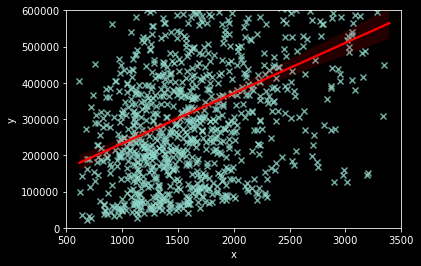

In [68]:
ax1=sns.regplot(x='x', y='y',ci=95, data=dfa.sample(n=1000), marker='x',scatter=True,line_kws={'color':'r'})


ax1.set_ylim(0,600_000)
ax1.set_xlim(500,3_500)
plt.show()



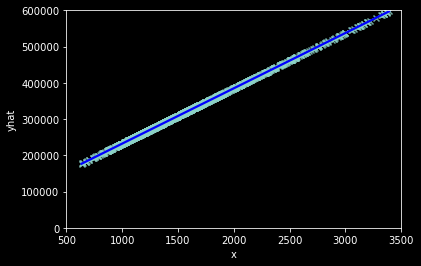

In [69]:


ax2=sns.regplot(x='x', y='yhat',ci=95, data=dfa.sample(n=1000), marker='x',scatter=True,line_kws={'color':'b'})
ax2.set_ylim(0,600_000)
ax2.set_xlim(500,3_500)
plt.show()




In [70]:


df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips', 'decade'],
      dtype='object')>

In [71]:



df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,decade,county
432459,4,3,"1,817",7.806e+04,"1,955","1,095",6037,15,Los Angeles County
1886307,3,1,980,1.67e+05,"1,955","2,821",6037,15,Los Angeles County
2132440,4,2,"1,870",4.53e+05,"1,955","5,586",6037,15,Los Angeles County
444723,3,3,"1,924",5.398e+05,"1,948","6,514",6037,14,Los Angeles County
408532,4,3,"2,405",5.563e+05,"1,999","6,961",6059,19,Orange County


In [72]:
df.county.unique()


array([' Los Angeles County', ' Orange County'], dtype=object)

In [86]:

df.head()

out=df.decade.unique()
out=out.tolist()
out.sort()
out



[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]